<a href="https://colab.research.google.com/github/zuzanadostalova/Tutorials/blob/master/Reference_Fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import tensorflow and helper libraries.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc2


Import MNIST dataset.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Loading the dataset returns four Numpy arrays.
# Imagaes are 28x28 NumPy arrays, pixels 0-255, labels are an array of integers
# 0-9.

4423680/4422102 [==============================] - 0s 0us/step


Class names are not included in the dataset, add them for later use when plotting images.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Format of the dataset:

In [4]:
# There are 60000 images in the training set represented as 28x28 pixels.
train_images.shape

(60000, 28, 28)

In [5]:
# There are 60000 labels in the training set.
len(train_labels)

60000

In [6]:
# Each label is an integer 0-9.
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# In the test set, there are 10000  represented as 28x28 pixels.
test_images.shape

(10000, 28, 28)

In [8]:
# There are 10000 labels in the training set.
len(test_labels)

10000

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Data preprocessing:

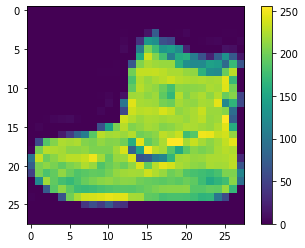

In [10]:
# The first image in the training set is repsented by 0-255 pixels, however,
# that cannot be input for your model.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale them to a range of 0 to 1 before loading them to the neural network model.

In [0]:
# Training and testing set have to be preprocessed in the same way.
train_images = train_images / 255
test_images = test_images / 255

To verify the data before building NN, display the first 25 images.

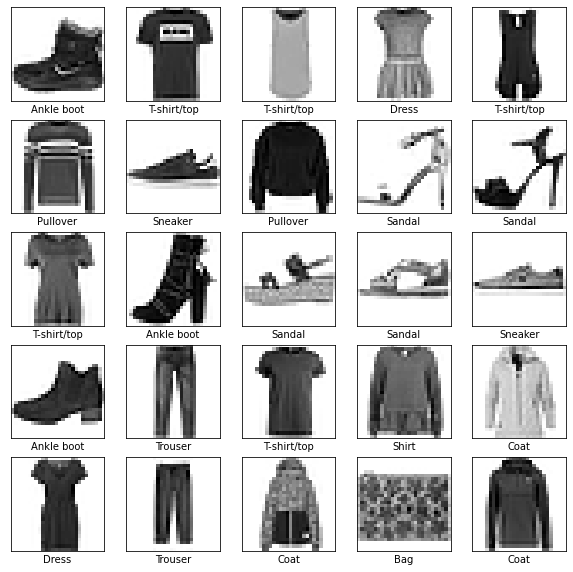

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Model building.

I. Set up the layers.

In [13]:
from keras.layers.normalization import BatchNormalization

model = keras.Sequential([
                        # Flatten layer is unstacking rows of pixels in the 
                        # image and lining them up - 784 pixels. 
                         keras.layers.Flatten(input_shape=(28,28)),
                        # The first Dense layer has 128 nodes (or neurons). 
                        # The second (and last) layer returns a logits array 
                        # with length of 10. Each node contains a score indicating
                        # the current image belongs to one of the 10 classes.
                        # Dense = fully connected layer.

                        # The more neurons you have, the more features they
                        # can recognise.

                        # 2 Dense layers with ReLU - test accuracy: 0.8843
                         keras.layers.Dense(128, activation='relu'),
                        # 3 Dense layers - Test accuracy 0.8817999958992004
                         keras.layers.Dense(10) 
])

Using TensorFlow backend.


II. Compile the model.

In [0]:
# Loss function —This measures how accurate the model is during training. 
# You want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated based on the data it sees and its 
# loss function.
# Metrics —Used to monitor the training and testing steps. The following example 
# uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

III. Train the model.

A) Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5013 - accuracy: 0.8219
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3717 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3345 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3113 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2938 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2763 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2675 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2554 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2432 - accuracy: 0.9098
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

B) Evaluate accuracy of the model on test dataset.

In [16]:
# verbose=2 will just mention the number of epoch.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy', test_acc)

# It turns out that the accuracy on the test dataset is a little less than 
# the accuracy on the training dataset. This gap between training accuracy 
# and test accuracy represents overfitting. Overfitting happens when 
# a machine learning model performs worse on new, previously unseen inputs 
# than it does on the training data. An overfitted model "memorizes" the noise 
# and details in the training dataset to a point where it negatively impacts
# the performance of the model on the new data.

313/313 - 0s - loss: 0.3700 - accuracy: 0.8774

Test accuracy 0.8773999810218811


C) Make predictions.

In [0]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [19]:
# Array of 10 numbers representing the confidence that the image corresponds
# the 10 different articles of clothing.
predictions[0]

array([1.0611488e-05, 3.5021031e-09, 8.5514235e-10, 8.5902646e-10,
       7.2129048e-08, 1.8296930e-03, 1.6496055e-07, 5.3902538e-03,
       5.2266699e-07, 9.9276876e-01], dtype=float32)

In [20]:
# Which label has the highest confidence?
np.argmax(predictions[0])
# This label is for ankle boot, or class_names[9].

9

In [21]:
# Check if the model is correct.
test_labels[0]

9

Build a graph to look at the full set of 10 class predictions.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions about some images.

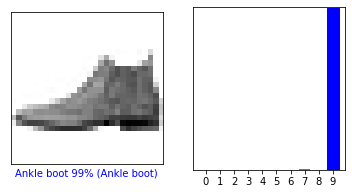

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

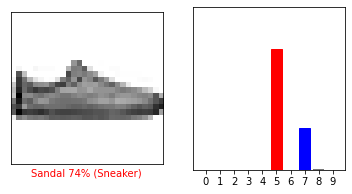

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

Plot images with their predictions.

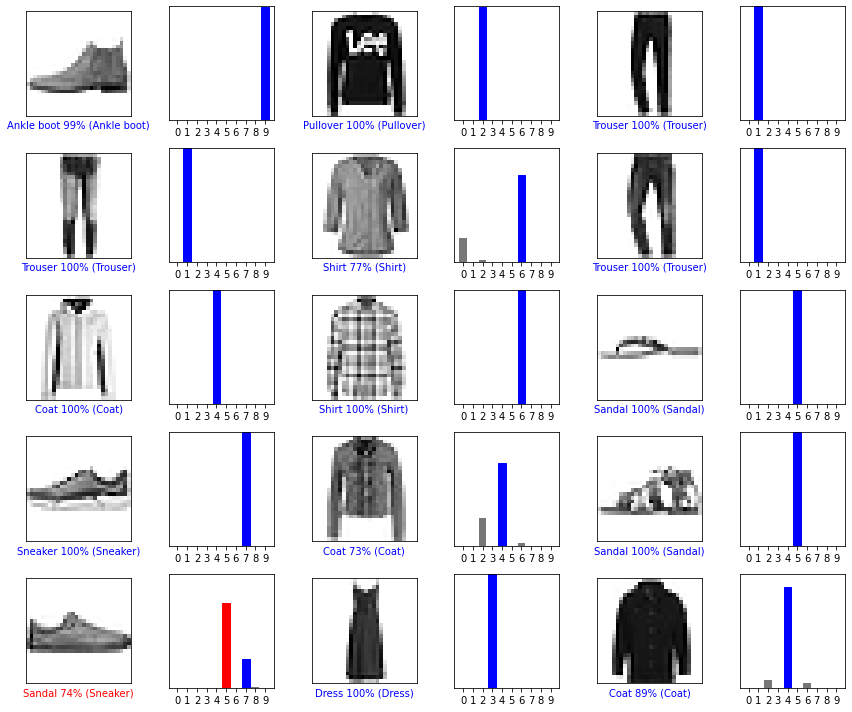

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use trained model to predict a single image.

In [26]:
img = test_images[1]
print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [28]:
# Predict the correct label for the image.
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.1697769e-04 1.3878648e-16 9.9849868e-01 5.1709136e-12 3.9891197e-04
  4.5445930e-10 9.8541321e-04 2.8270055e-14 1.2223297e-11 1.9682304e-17]]


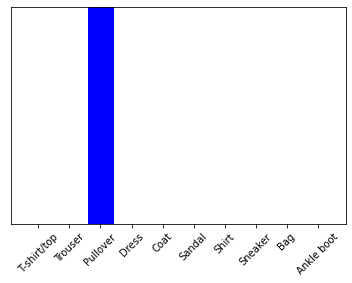

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
# Returns a list of lists—one list for each image in the batch of data. 
# Grab the predictions for our (only) image in the batch:
np.argmax(predictions_single[0])

2